### K mean clustering 

In [4]:
## Import all the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [5]:
df = pd.read_csv('../data/PreProcessed/MixWine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Let's see corelation matrix to find correlation between features

<AxesSubplot:>

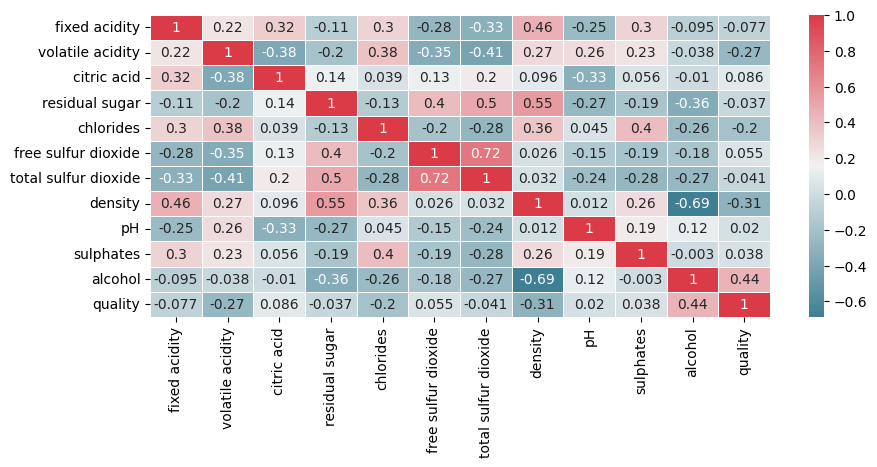

In [6]:
plt.figure(figsize=(10, 4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, annot=True, linewidths=0.5)

###  *As it is visible from the matrix above that*
### *(residual sugar, density) = 0.84 and (alcohol, density) = -0.78 have strong corelations*

<Figure size 1000x1000 with 0 Axes>

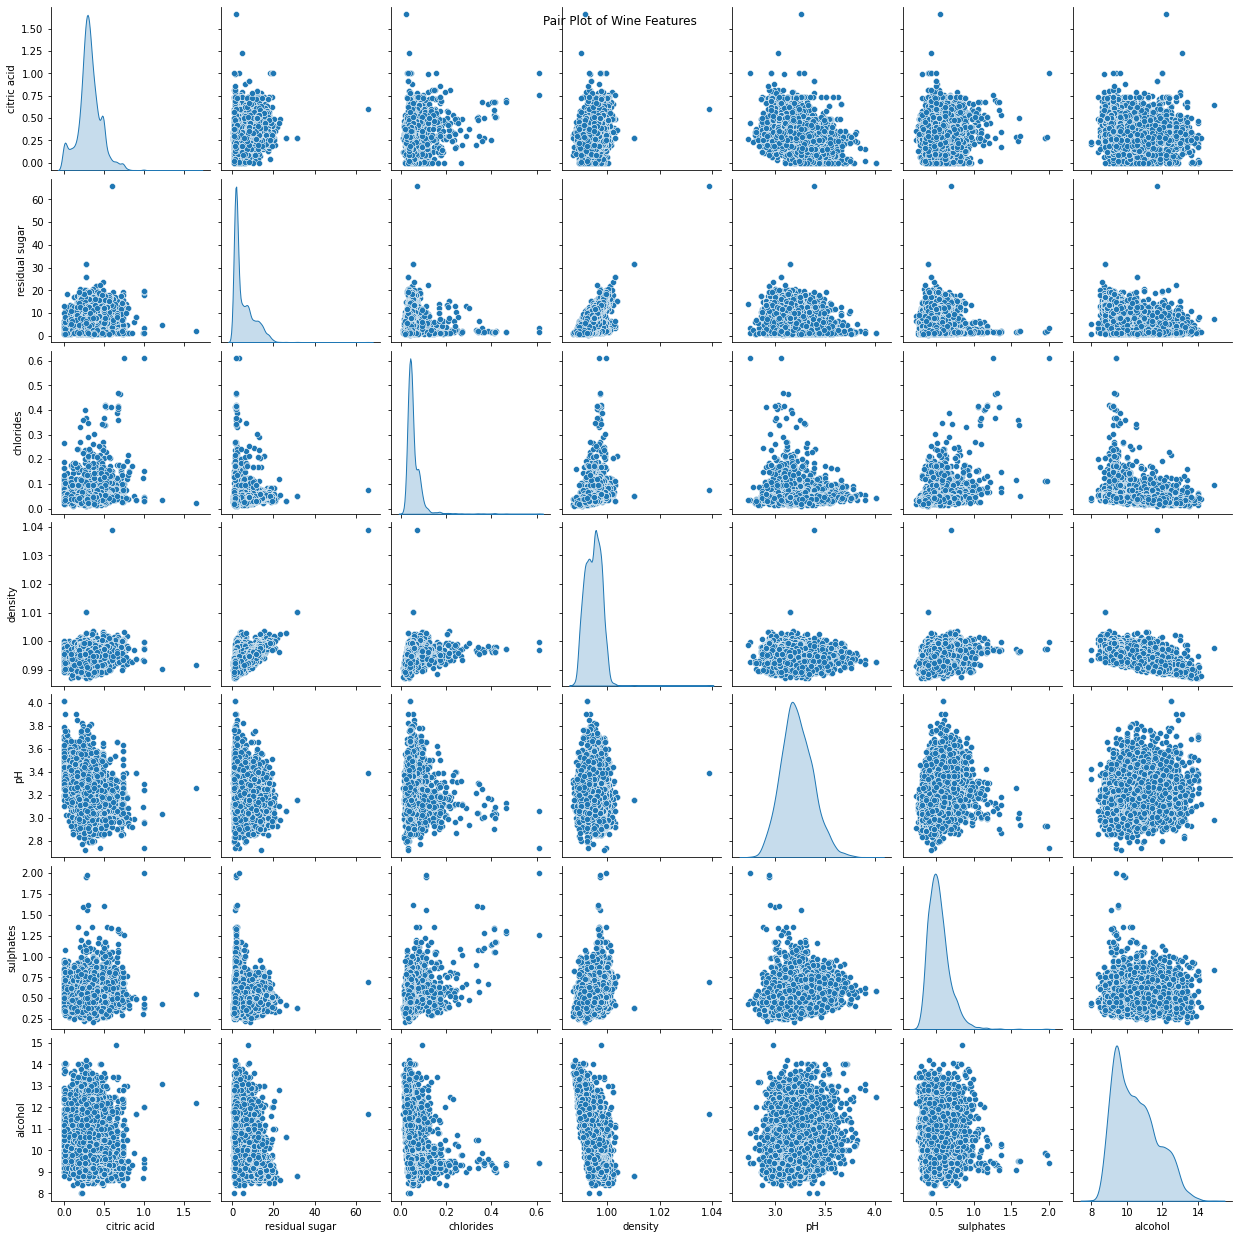

In [7]:
# Create a pair plot to see scatterplot between varuios features
plt.figure(figsize=(10, 10), dpi=100)
sns.pairplot(df[['citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']], diag_kind="kde", markers='o')
plt.suptitle("Pair Plot of Wine Features")
plt.show()

## *From the above pairplot, pH and alcohol seems good candidates for clustering as the data is spherical*

C:\Users\Vikas\AppData\Local\Temp\ipykernel_28840\2357723199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['pH', 'alcohol']] = scaler.transform(X)


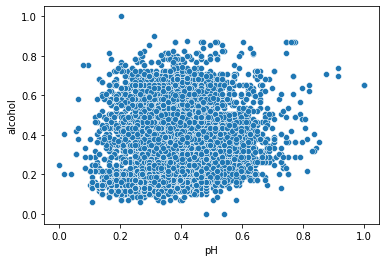

In [8]:
X = df[['pH', 'alcohol']]
scaler = MinMaxScaler()
scaler.fit(X)
X[['pH', 'alcohol']] = scaler.transform(X)
# X.head()


sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1])
# Add labels to the axes
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
# Show the plot
plt.show()

### Let us use k mean clustering with 3 clusters and see how the clusters look like

In [9]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=1000)
kmeans

KMeans(n_clusters=3, n_init=1000, random_state=0)

In [10]:
y_predict = kmeans.fit_predict(X)
y_predict

array([0, 2, 2, ..., 2, 1, 1])

In [11]:
centroids = kmeans.cluster_centers_
centroids

array([[0.51774157, 0.32798529],
       [0.36590667, 0.56844605],
       [0.31192448, 0.22374469]])

C:\Users\Vikas\AppData\Local\Temp\ipykernel_28840\1875994368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = y_predict


<AxesSubplot:xlabel='pH', ylabel='alcohol'>

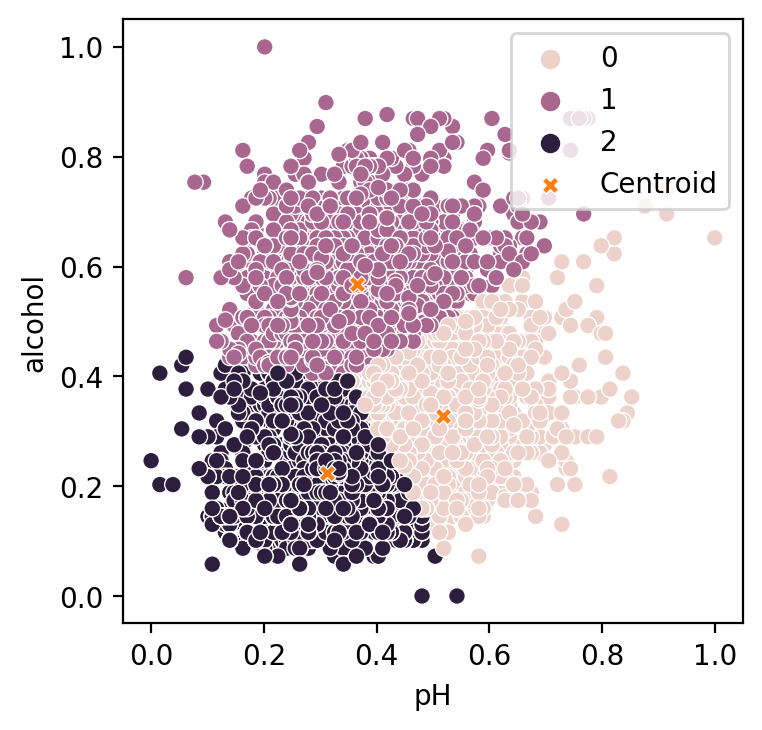

In [12]:
X["cluster"] = y_predict
plt.figure(figsize=(4, 4), dpi=200)
sns.scatterplot(x = X.iloc[:, 0] , y = X.iloc[:, 1], hue = X["cluster"])
sns.scatterplot(data = centroids, x = centroids[:,0], y = centroids[:,1], marker='X', label='Centroid')

## In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set
## For elbow method, we should plot sse(sum of squared errors) vs different k values and check the point where elbow is formed

In [13]:
sse = [] ## sum of squared errors
k_range = range(2,10)
score = []
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    score.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
score

[0.7005277954531772,
 0.8501561158883062,
 0.7088319231512057,
 0.4932939530920507,
 0.3556786679633088,
 0.36823036590019637,
 0.3926379950938401,
 0.3845362882684945]

[Text(0.5, 0, 'no of clusters'),
 Text(0, 0.5, 'SSE(Sum of squared error)'),
 Text(0.5, 1.0, 'sse vs number of clusters')]

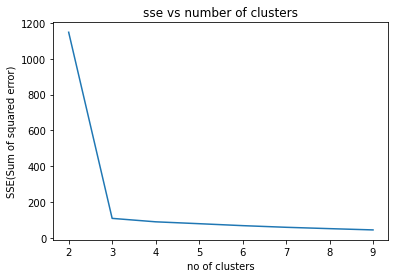

In [14]:
sseplot = sns.lineplot(x = k_range, y = sse)
sseplot.set(xlabel ="no of clusters", ylabel = "SSE(Sum of squared error)", title ="sse vs number of clusters")

### Elbow method here suggest k = 3 but we should check with silhouette coefficient as well

In [15]:
### defining a function to help to visualize silhouette coefficient values
def visualize_silhouette(X, n_clusters, range_n_clusters, cluster_labels):
    for n_clusters in range_n_clusters:
        # Create a subplot for the silhouette plot
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(7, 5)

        # The silhouette coefficient can range from -1 to 1, but in this example, all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.4, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for the next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for the average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the y-axis labels / ticks
        ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [ ]:
visualize_silhouette(X, k, k_range, kmeans.labels_)

For n_clusters = 2 The average silhouette_score is : 0.7005277954531772
For n_clusters = 3 The average silhouette_score is : 0.8501561158883062
For n_clusters = 4 The average silhouette_score is : 0.6435756086363944
For n_clusters = 5 The average silhouette_score is : 0.5041303642609763
For n_clusters = 6 The average silhouette_score is : 0.3669962555982111


### **CONCLUSION** 
### *As we can see elbow method suggested k = 3, For n_clusters = 3 The average silhouette_score is : 0.8305014959810723 which is highest.*
### *Also in the image below we can see that there are not negative values so it suggest that k = 3 is a good value and three clusters are of almost same sizes.*
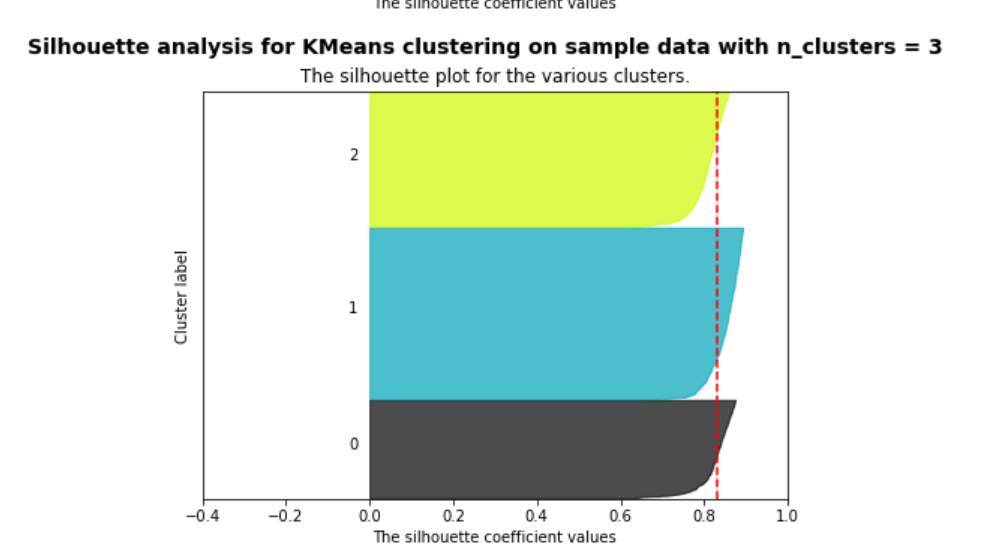

## K-Mean Limitations
 >  Data that aren’t spherical or should not be spherical do not work well with k-means clustering
 
 >  It requires predefined number of clusters (K) which is challenging sometimes when we do not know much about the data.
 
 > Sensitive to outliers, as outliers can change of position of the cluster centroids so these outliers can heavily influecne the final clusters. 
 
 > Distance metric (e.g., Euclidean distance, Manhattan distance) can influcence the results so appropriate matric should be choosen according to the data and the problem. 
 
 > Numerical data only, may not work well on categorical or mixed data.
 

